# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Dataset
- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank. (0=No,1=Yes)

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (9,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.shape

(10000, 14)

The datset has **1000** rows with **14** attributes

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Exploratory Data Analysis and Visualization

    1. Implement basic steps to see how is your data looks like
    2. Check for missing values
    3. Drop the features that not suitable for modelling
    4. Implement basic visualization steps such as histogram, countplot, heatmap
    5. Convert categorical variables to dummy variables

👇👇👇We dropped follow columns. Because these columnns has no effect on customer leaving the bank.👇👇👇

In [5]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [6]:
print(df.isnull().sum().any())
print(df.duplicated().sum())

False
0


👆👆👆We have no miissing value and duplicated value 👆👆👆

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


## Exited Column

In [8]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- Our dataset is imbalanced. 
- Nonexited customers more than exited customers. 
- Our goal should be identify exited customers accurately

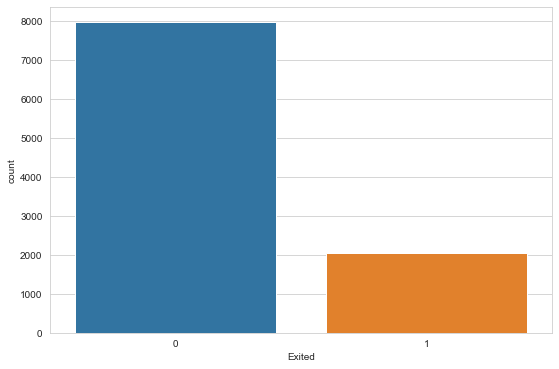

In [9]:
sns.countplot(df["Exited"]);

In [10]:
col = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
for i in col:
    print(i.upper())
    print(df[i].value_counts())
    print("---"*10)

GEOGRAPHY
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
GENDER
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------
TENURE
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------------------
NUMOFPRODUCTS
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
------------------------------
HASCRCARD
1    7055
0    2945
Name: HasCrCard, dtype: int64
------------------------------
ISACTIVEMEMBER
1    5151
0    4849
Name: IsActiveMember, dtype: int64
------------------------------


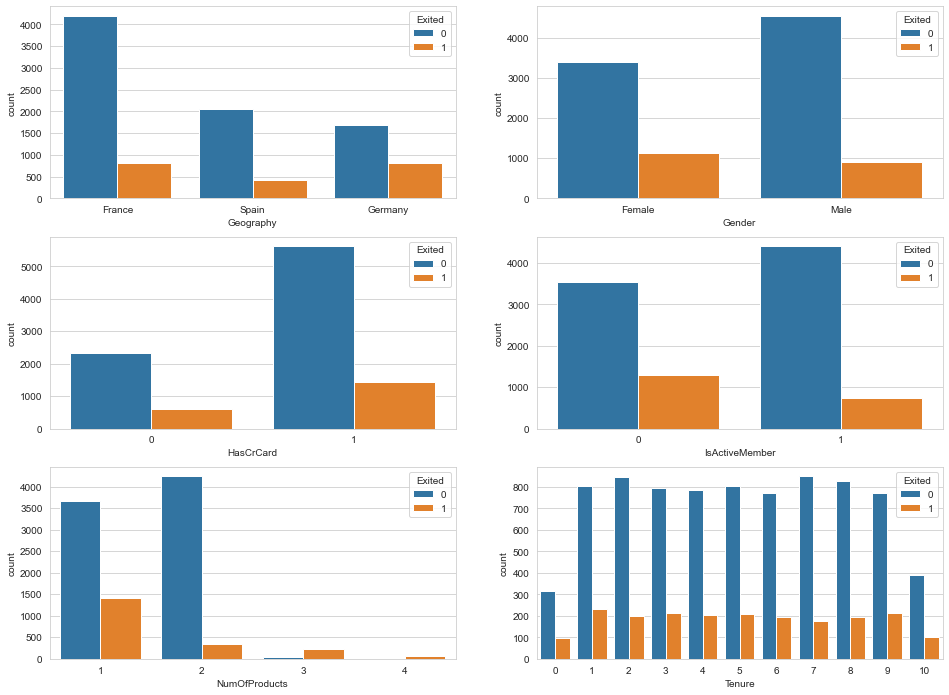

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1]);
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=ax[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=ax[2][1]);

                                                👆👆👆
- Most of the customers are from France. However, the number of customers churned is less in France and more in Germany compared to the population. 
- Male customers more than female customers, but more female customers churned
- The majority of the customers that churned are those with credit cards
- The majority of the customers that churned are those inactive memebers

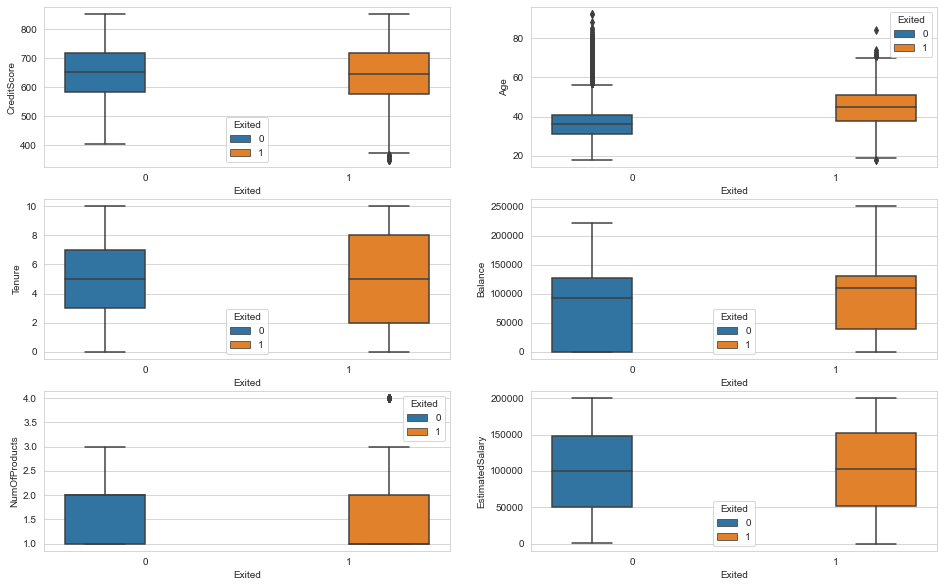

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(16, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1]);

                                                👆👆👆
- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones
- Customers with high balance scores leave the bank
- Number of products and salary amount do not have a significant effect on leaving the bank

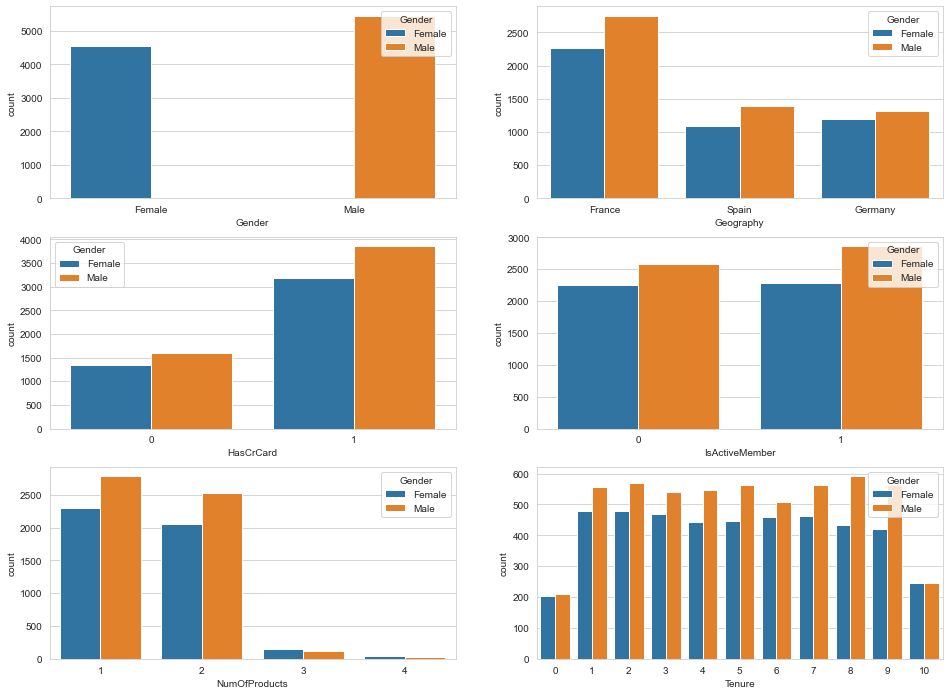

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Gender', hue = 'Gender',data = df, ax=ax[0][0])
sns.countplot(x='Geography', hue = 'Gender',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Gender',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Gender',data = df, ax=ax[1][1]);
sns.countplot(x='NumOfProducts', hue = 'Gender',data = df, ax=ax[2][0])
sns.countplot(x='Tenure', hue = 'Gender',data = df, ax=ax[2][1]);

👆👆👆In all categories shown in the chart, the number of male customers is more than the number of female customers.👆👆👆

## Age Column

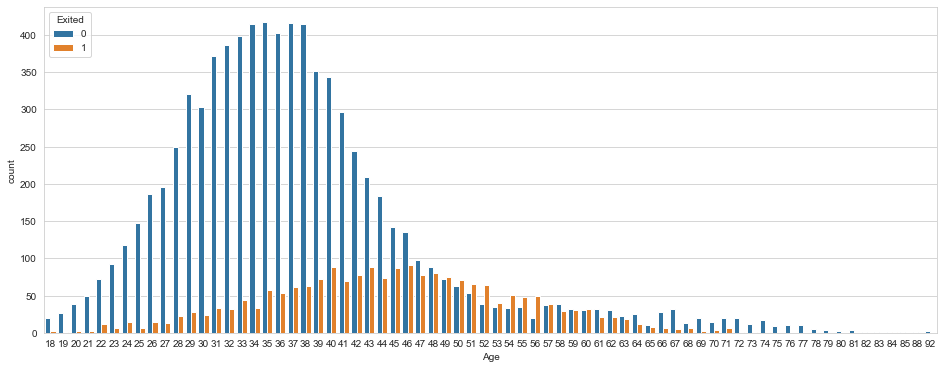

In [14]:
plt.figure(figsize = (16, 6))
sns.countplot(x="Age", hue="Exited", data=df);

👆👆👆The age distribution of active customers and exited customers is almost similar.👆👆👆

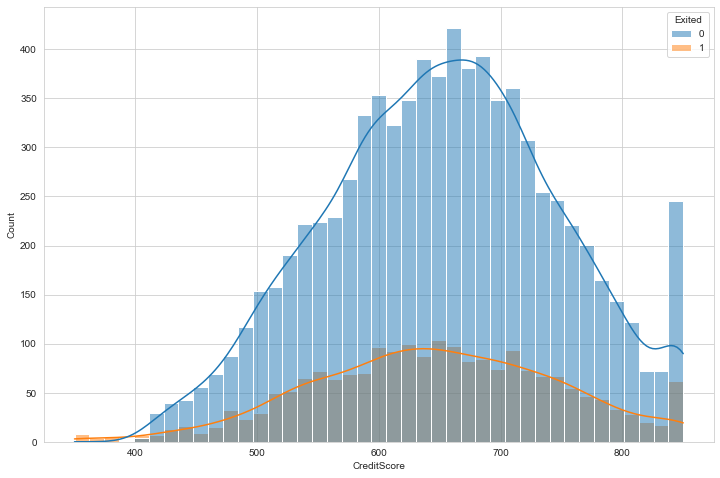

In [15]:
plt.figure(figsize = (12, 8))
sns.histplot(x="CreditScore", data=df,kde = True, hue = "Exited");

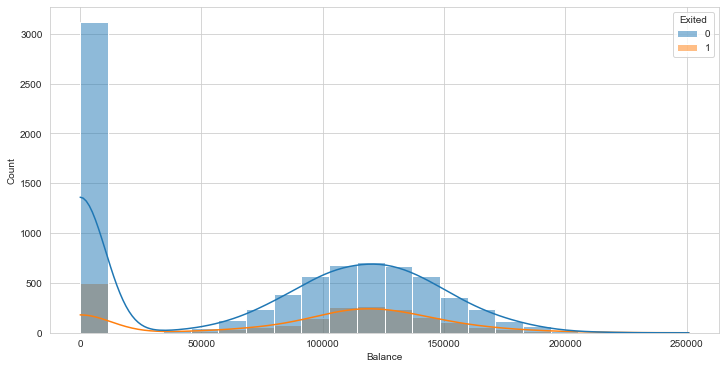

In [16]:
plt.figure(figsize = (12, 6))
sns.histplot(x="Balance", data=df, hue = "Exited", kde = True);

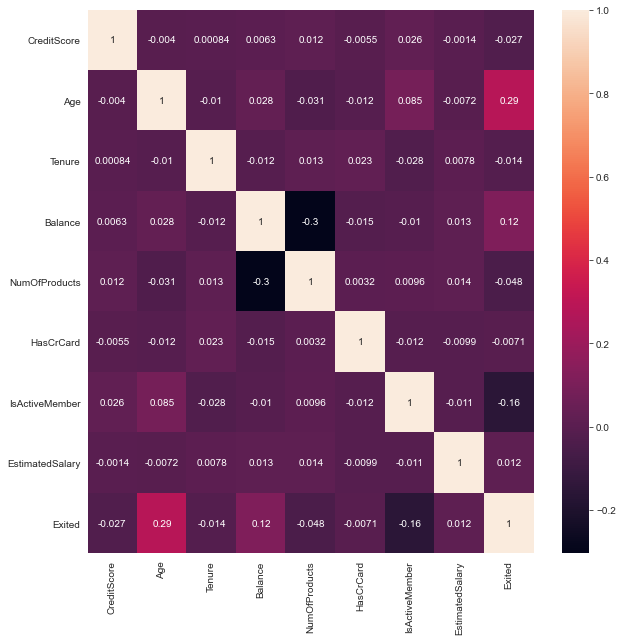

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

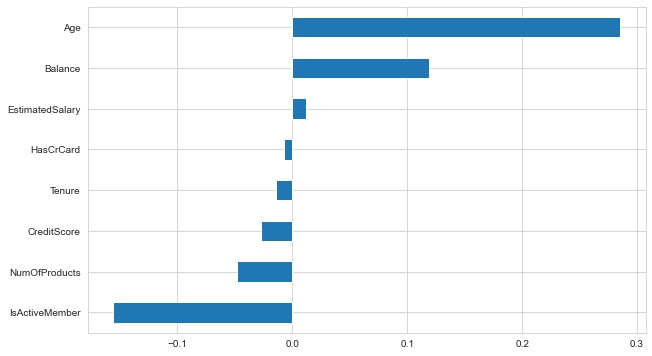

In [18]:
plt.figure(figsize = (10,6))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(8000, 11)

In [23]:
X_test.shape

(2000, 11)

## Modelling & Model Performance

### Import related libraries

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import Accuracy, Recall,Precision
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.optimizers import Adam, SGD,RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

### Creating Model

### without class_weigth

In [82]:
model = Sequential()

model.add(Dense(44, activation = "relu"))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [83]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15, restore_best_weights=True)

In [84]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4854 - recall: 0.0650 - val_loss: 0.4291 - val_recall: 0.2500
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4201 - recall: 0.2625 - val_loss: 0.3857 - val_recall: 0.2039
Epoch 3/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3897 - recall: 0.3329 - val_loss: 0.3513 - val_recall: 0.3355
Epoch 4/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3691 - recall: 0.3755 - val_loss: 0.3493 - val_recall: 0.3092
Epoch 5/1000
225/225 [==============================] - 0s 1ms/step - loss: 0.3644 - recall: 0.3829 - val_loss: 0.3422 - val_recall: 0.4145
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3610 - recall: 0.3972 - val_loss: 0.3354 - val_recall: 0.3882
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3571 - recall: 0.3890 - val_loss: 0.3311 - val_recall: 0.3684
Epoch 8/1000
225/225

#### Evaluate

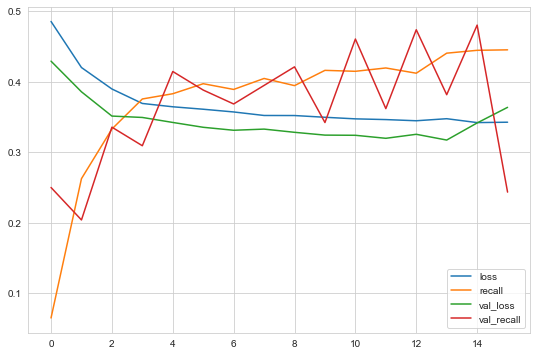

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [86]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1519   74]
 [ 314   93]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1593
           1       0.56      0.23      0.32       407

    accuracy                           0.81      2000
   macro avg       0.69      0.59      0.61      2000
weighted avg       0.77      0.81      0.77      2000



👆👆👆Our results are good, but we need to increase the recall value for 1 values.👆👆👆

👇👇👇For this we will use the class weight parameter in ANN👇👇👇

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [89]:
from sklearn.utils import class_weight

In [90]:
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train), 
                y_train))) 

In [91]:
model = Sequential()

model.add(Dense(44, activation = "relu"))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [92]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [93]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1, class_weight = class_weights, callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.6193 - recall: 0.6590 - val_loss: 0.5079 - val_recall: 0.5724
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5450 - recall: 0.7300 - val_loss: 0.4622 - val_recall: 0.7632
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5046 - recall: 0.7300 - val_loss: 0.4746 - val_recall: 0.7566
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4980 - recall: 0.7429 - val_loss: 0.4798 - val_recall: 0.7368
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4887 - recall: 0.7375 - val_loss: 0.4234 - val_recall: 0.7368
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4806 - recall: 0.7463 - val_loss: 0.5407 - val_recall: 0.8487
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4785 - recall: 0.7368 - val_loss: 0.4143 - val_recall: 0.7237
Epoch 8/1000
225/225

#### Evaluate

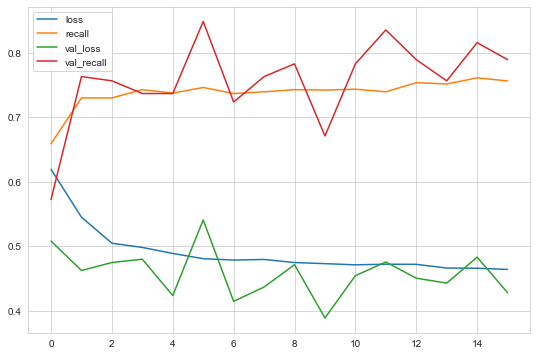

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [95]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1278  315]
 [ 109  298]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.73      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



👆👆👆Accuracy score dropped after class-weight operation, but reacll score increased considerably👆👆👆

## GridSearchCV

In [96]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [97]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 44, activation = 'relu'))
    classifier.add(Dense(units = 22, activation = 'relu'))
    classifier.add(Dense(units = 11, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [98]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [99]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1,)
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weights)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.6335 - recall: 0.6939
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5882 - recall: 0.6883
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5674 - recall: 0.7067
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5506 - recall: 0.7129
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5355 - recall: 0.7264
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.5224 - recall: 0.7294: 0s - loss: 0.5336 - 
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5109 - recall: 0.7301
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5024 - recall: 0.7374
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4962 - recall: 0.7393
Epoch 10/200
250/250 [==

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000019D68003400>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='recall', verbose=1)

In [100]:
grid_model.best_score_

0.7651911205871281

In [101]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'rmsprop'}

In [114]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1381  212]
 [ 147  260]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1593
           1       0.55      0.64      0.59       407

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000



#### Evaluate

#### for keras models

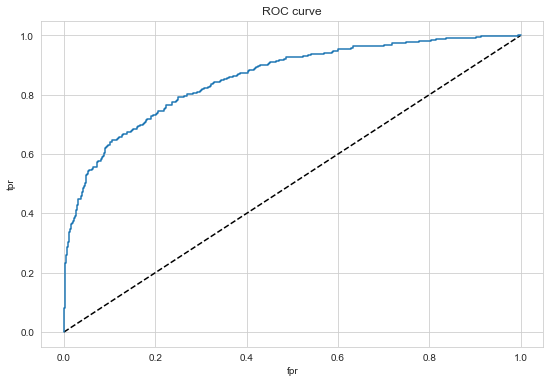

In [102]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

#### for gridsearchcv model

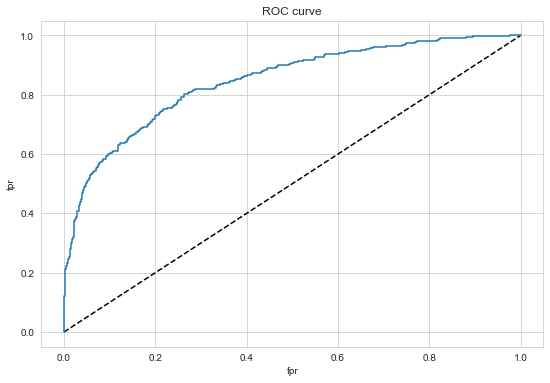

In [103]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [104]:
roc_auc_score(y_test, y_pred_proba)

0.8455882693170829

## Final Model and Model Deployment

We use the best parameters that we found with Grid Search in the final model.

In [107]:
import pickle
pickle.dump(scaler, open("scaler_bank", 'wb'))

In [108]:
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train), 
                y_train)))

In [109]:
model = Sequential()
model.add(Dense(44, activation = "relu"))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [110]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [111]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1, class_weight = class_weights, callbacks = [early_stop])

Epoch 1/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.6038 - recall: 0.6748 - val_loss: 0.4383 - val_recall: 0.5307
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.5241 - recall: 0.7196 - val_loss: 0.5461 - val_recall: 0.7985
Epoch 3/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.5037 - recall: 0.7166 - val_loss: 0.6378 - val_recall: 0.8600
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4944 - recall: 0.7380 - val_loss: 0.4681 - val_recall: 0.7690
Epoch 5/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4890 - recall: 0.7301 - val_loss: 0.5119 - val_recall: 0.7641
Epoch 6/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4837 - recall: 0.7313 - val_loss: 0.4524 - val_recall: 0.7297
Epoch 7/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.4800 - recall: 0.7460 - val_loss: 0.4421 - val_recall: 0.7297
Epoch 8/1000
250/250

<AxesSubplot:>

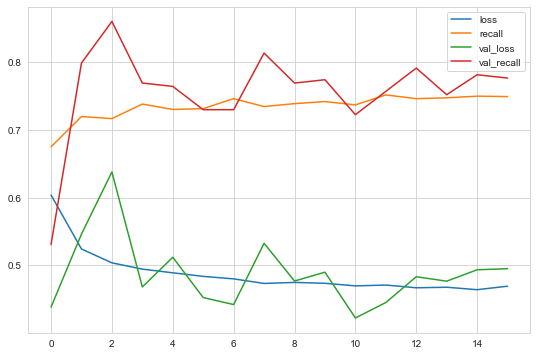

In [112]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [113]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1212  381]
 [  91  316]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.45      0.78      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



👆👆👆At this stage, Adam and RMSprop were tested. Learning rate changed. The highest scoring result has been found👆👆👆

In [115]:
model.save('model_bank.h5')

### Prediction

In [116]:
from tensorflow.keras.models import load_model
model_bank = load_model('model_bank.h5')
scaler_bank = pickle.load(open("scaler_bank", "rb"))

In [121]:
customer = df.drop('Exited', axis = 1).iloc[5:10, :]
customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5,645,44,8,113755.780,2,1,0,149756.710,0,1,1
6,822,50,7,0.000,2,1,1,10062.800,0,0,1
7,376,29,4,115046.740,4,1,0,119346.880,1,0,0
8,501,44,4,142051.070,2,0,1,74940.500,0,0,1
9,684,27,2,134603.880,1,1,1,71725.730,0,0,1


In [122]:
customer = scaler_bank.transform(customer)
customer

array([[0.59      , 0.35135135, 0.8       , 0.47718841, 0.33333333,
        1.        , 0.        , 0.74879716, 0.        , 1.        ,
        1.        ],
       [0.944     , 0.43243243, 0.7       , 0.        , 0.33333333,
        1.        , 1.        , 0.0502609 , 0.        , 0.        ,
        1.        ],
       [0.052     , 0.14864865, 0.4       , 0.48260379, 1.        ,
        1.        , 0.        , 0.59673349, 1.        , 0.        ,
        0.        ],
       [0.302     , 0.35135135, 0.4       , 0.5958829 , 0.33333333,
        0.        , 1.        , 0.37468038, 0.        , 0.        ,
        1.        ],
       [0.668     , 0.12162162, 0.2       , 0.56464305, 0.        ,
        1.        , 1.        , 0.358605  , 0.        , 0.        ,
        1.        ]])

In [123]:
(model_bank.predict(customer) > 0.5).astype("int32")

array([[1],
       [0],
       [1],
       [1],
       [0]])

In [125]:
df["Exited"].iloc[5:10]

5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

Our model made an accurate prediction of 80% on the given sample values👏👏👏

## Comparison with ML

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(class_weight="balanced")
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1137  456]
 [ 122  285]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight="balanced")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1549   44]
 [ 226  181]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



**Our model scores better than ML models**👏👏👏